# Assignment 2
## FeedForward Neural Network with Keras nd TensorFlow

### What is a feed forward neural network?
Feed forward neural networks are artificial neural networks in which nodes do not form loops. This type of neural network is also known as a multi-layer neural network as all information is only passed forwar 


During data flow, input nodes receive data, which travel through hidden layers, and exit output nodes. No links exist in the network that could get used to by sending information back from the output no
.

A feed forward neural network approximates functions in the followin: 
ay:

An algorithm calculates classifiers by using the formula y = f* (x).
Input x is therefore assigned to category y.
According to the feed forward model, y = f (x; θ). This value determines the closest approximation of the function.
Feed forward neural networks serve as the basis for object detection in photos, as shown in the Google P__hotos app.

### 1)Import necessary packages

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

### 2)Load training testing data

__What is MNIST dataset? 
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.__

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#To perform Machine Learning, it is important to convert all the values from 0 to 255 for every pixel to a range of values from 0 to 1.
#The simplest way is to divide the value of every pixel by 255 to get the values in the range of 0 to 1. 
#X_train = X_train / 255 X_test = X_test / 255.
x_train = x_train/255
x_test = x_test/255

### 3)Define network Architecture using Keras

__Flatten layers => are used when you got a multidimensional output and you want to make it linear to pass it onto a Dense layer.__

__Dense layers => are used when association can exist among any feature to any other feature in data point .Since between two layers of size n1 and n2, there can n1∗n2 connections and these are referred to as Dense__

__conv layers => these are important when nearby associations among the features matter, example object detection. Neighborhoods matter to classify or detect.__

In [5]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4)Train the model using SGD

__Stochastic Gradient Descent (SGD):
Stochastic Gradient Descent (SGD) is a variant of the Gradient Descent algorithm that is used for optimizing machine learning models. It addresses the computational inefficiency of traditional Gradient Descent methods when dealing with large datasets in machine learning projects__
__In SGD, instead of using the entire dataset for each iteration, only a single random training example (or a small batch) is selected to calculate the gradient and update the model parameters. This random selection introduces randomness into the optimization process, hence the term “stochastic” in stochastic Gradient Descent__
__The advantage of using SGD is its computational efficiency, especially when dealing with large datasets. By using a single example or a small batch, the computational cost per iteration is significantly reduced compared to traditional Gradient Descent methods that require processing the entire dataset.__

__LOSS => In machine learning, Loss function is used to find error or deviation in the learning process. Keras requires loss function during model compilation process.__

__METRICS => In machine learning, Metrics is used to evaluate the performance of your model.__

__Optimization => is an important process which optimize the input weights by comparing the prediction and the loss function.__

In [6]:
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [7]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=11)

Epoch 1/11
1875/1875 [==============================] - 20s 9ms/step - loss: 0.6453 - accuracy: 0.8400 - val_loss: 0.3530 - val_accuracy: 0.9045
Epoch 2/11
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3310 - accuracy: 0.9078 - val_loss: 0.2863 - val_accuracy: 0.9220
Epoch 3/11
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2807 - accuracy: 0.9215 - val_loss: 0.2528 - val_accuracy: 0.9290
Epoch 4/11
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2492 - accuracy: 0.9298 - val_loss: 0.2275 - val_accuracy: 0.9364
Epoch 5/11
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2254 - accuracy: 0.9362 - val_loss: 0.2123 - val_accuracy: 0.9399
Epoch 6/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2068 - accuracy: 0.9418 - val_loss: 0.1963 - val_accuracy: 0.9433
Epoch 7/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1910 - accuracy: 0.9465 - val_loss: 0.1815 - val_acc

### 5) Evaluate the Network

In [8]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1487 - accuracy: 0.9561
Loss=0.149
Accuracy=0.956


__The imshow() function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.__

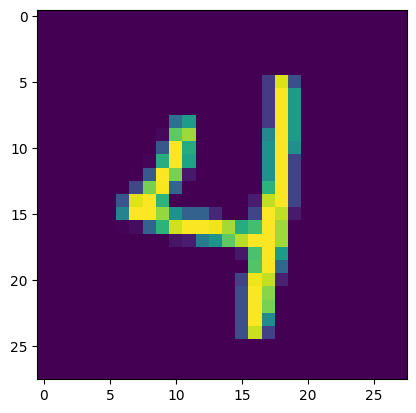

313/313 [==============================] - 1s 3ms/step


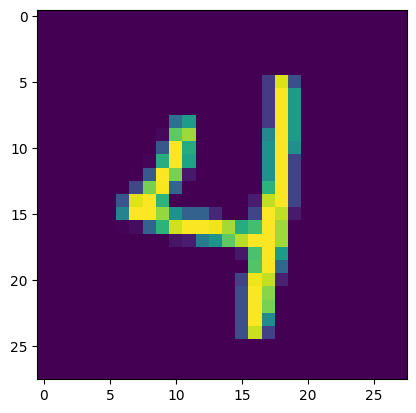

In [18]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [10]:
print('Predicted Value: ', predicted_value[n])

Predicted Value:  [1.8997405e-05 2.5844465e-06 2.4650735e-04 2.7849447e-04 3.4653000e-05
 5.8302172e-05 1.6209201e-06 5.5649457e-07 9.9921739e-01 1.4087165e-04]


### 6)plotbthe Training loaa and Accuracy

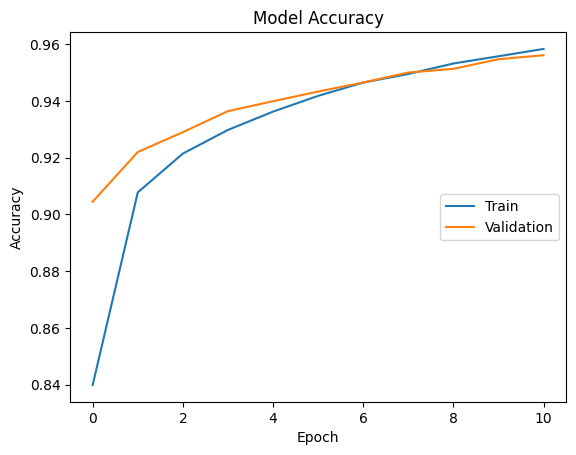

In [11]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

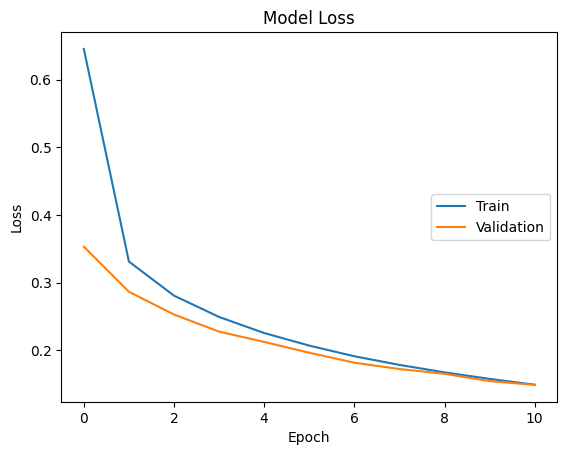

In [12]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()